<a href="https://colab.research.google.com/github/Prasad3617/IMAGE-MANIPULATIONS/blob/main/Image_Manipulations(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries required to perform Image Manipulations

In [202]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

In [203]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# FUNCTION DEFINITIONS

### Defining the function to read image from a particular path.

In [204]:
def read_image(image_path):    
    image=cv2.imread(image_path)
    return image

### Defining the function to display the image read on the screen.

In [205]:
def display_image(window_name, read_image):  
    cv2_imshow(read_image)
    cv2.waitKey(0)

### Defining the function to save the image to a particular location and in a   particular file format.

In [206]:
def save_image(image_name, image): 
    cv2.imwrite(image_name,image)

### Defining the function to perform resizing operation on the image read.

In [207]:
def resize_image(image,resize_dimensions,method_number):  
    methods=[cv2.INTER_AREA,cv2.INTER_LINEAR,cv2.INTER_NEAREST,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
    resize_method=methods[method_number]
    resized_image=cv2.resize(image,dimensions,interpolation=resize_method)
    return resized_image

### Defining the function to crop a selected portion of the read image.

In [208]:
def crop_image(image,crop_dimensions):  
    image_dims=image.shape
    h_s,h_e,w_s,w_e=crop_dimensions
    width_dims=[w_s,w_e]
    height_dims=[h_s,h_e]
    np.clip(height_dims,a_min=0,a_max=image_dims[0])
    np.clip(width_dims,a_min=0,a_max=image_dims[1])
    crop_image=image[height_dims[0]:height_dims[1],width_dims[0]:width_dims[1]]
    return crop_image

### Defining the function to perform image-translation operation.

In [209]:
def image_translation(image,dimensions):
    height_translation,width_translation=dimensions
    translation_matrix=np.float32([[1,0,width_translation],[0,1,height_translation]])
    translated_image=cv2.warpAffine(image,translation_matriximage.shape[1],image.shape[0])
    return translated_image

### Defining the function to perform image-rotation operation.

In [210]:
def image_rotation(image,dimensions,angle,scale):
    width,height=image.shape[:2]
    center = (width/2, height/2)
    rotated_image=cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))
    return rotated_image

# Driver code

### READING AN IMAGE

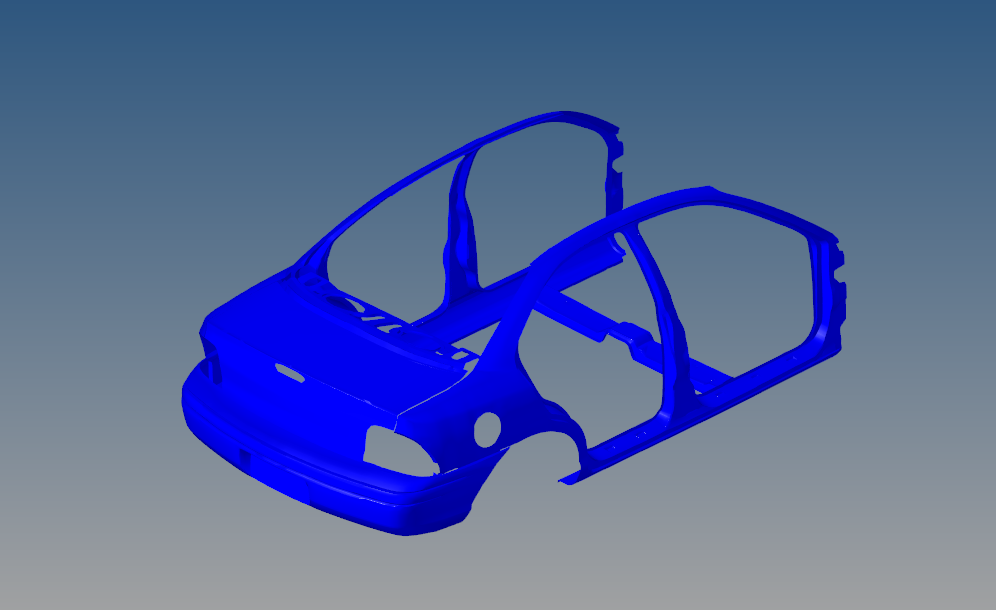

In [211]:
image=read_image("/content/drive/Othercomputers/My MacBook Air/Folder/Challenges/Challenge_1/Challenge_1.png")
display_image("Challenge_1",image)

### SAVING THE IMAGE

In [212]:
save_image("/content/drive/Othercomputers/My MacBook Air/Folder/Challenges/Challenge_1/Saved_images/saved_image.jpg",image)
print(image.shape)

(610, 996, 3)


### SOME PARAMETERS TO PERFORM OTHER OPERATIONS

In [213]:
dimensions=image.shape[:2]
height,width=image.shape[:2]
center = (width/2, height/2)
rotate_matrix=cv2.getRotationMatrix2D(center=center, angle=140, scale=1)
angle=140
scale=1

### ROTATING THE IMAGE

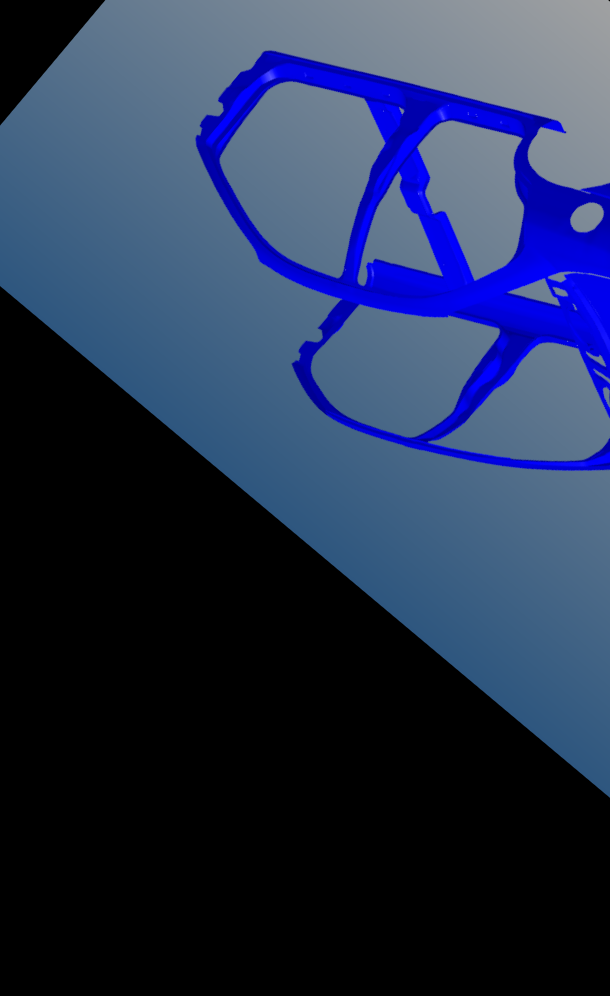

(996, 610, 3)


In [214]:
rotated_image=image_rotation(image,dimensions,angle,scale)
display_image("rotated-image",rotated_image)
print(rotated_image.shape)

### SCALING THE IMAGE

In [215]:
method_number=1
height2=(int(rotated_image.shape[0]))/2
width2=(int(rotated_image.shape[1]))/2
resize_dimensions=(height2,width2)

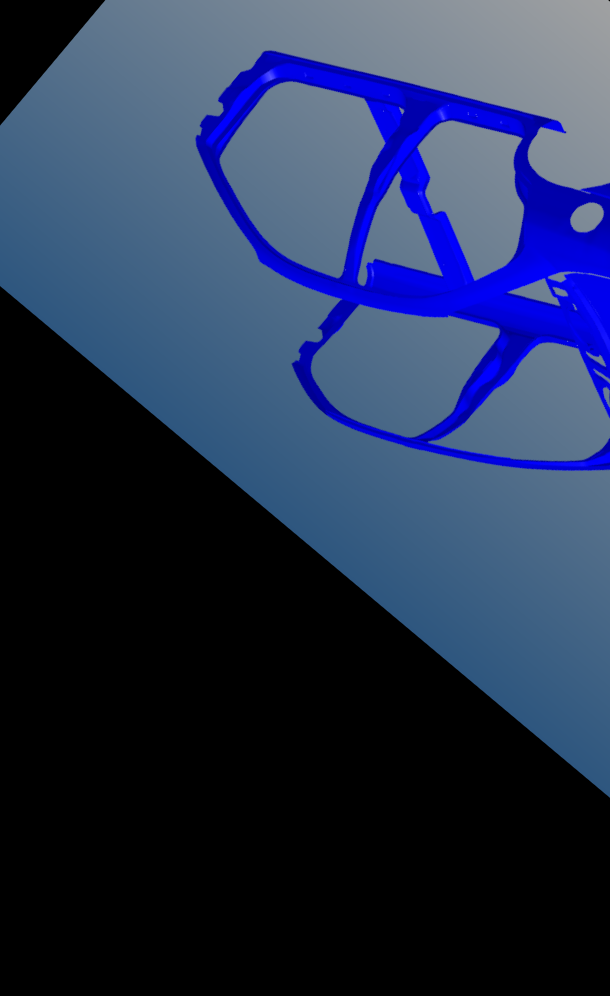

In [216]:
resized_image=resize_image(rotated_image,resize_dimensions,method_number)
display_image("resized-image",resized_image)

### CROPPING THE IMAGE

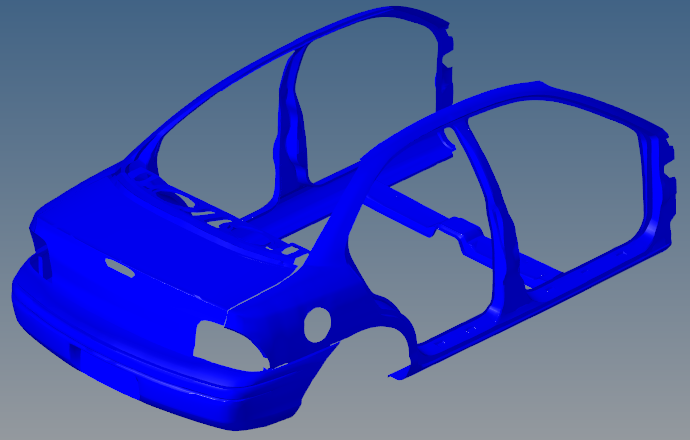

In [217]:
crop_dimensions=[105,545,170,860]
crop_image=crop_image(image,crop_dimensions)
display_image("cropped-image",crop_image)